In [1]:
import pylab as pl
from operator import itemgetter
from collections import OrderedDict, Counter

In [2]:
dataSet = [[1, 1], [3, 1], [1, 4], [2, 5], [1, 2], [3, 2], [2, 4], [1, 5], [11, 12], [14, 11], [13, 12], [11, 16],
           [17, 12], [12, 12], [11, 11], [14, 12], [12, 16], [17, 11], [28, 10], [26, 15], [27, 13], [28, 11], [29, 15],
           [29, 10], [26, 16], [27, 14], [28, 12], [29, 16], [29, 17], [29, 13], [26, 18], [27, 13], [28, 11], [29, 17]]

In [3]:
clusters = [idx for idx in range(len(dataSet))]
distances = {}
for idx1, point1 in enumerate(dataSet):
    for idx2, point2 in enumerate(dataSet):
        if (idx1 < idx2):
            distance = pow(abs(point1[0] - point2[0]), 2) + pow(abs(point1[1] - point2[1]), 2)
            distances[str(idx1) + "to" + str(idx2)] = distance

In [4]:
# order by distance
distances = OrderedDict(sorted(distances.items(), key=itemgetter(1), reverse=True))
groupNum = len(clusters)
finalClusterNum = int(groupNum * 0.1)
while groupNum > finalClusterNum:
    twopoins, distance = distances.popitem()
    pointA = int(twopoins.split('to')[0])
    pointB = int(twopoins.split('to')[1])
    pointAGroup = clusters[pointA]
    pointBGroup = clusters[pointB]
    if (pointAGroup != pointBGroup):
        for idx in range(len(clusters)):
            if clusters[idx] == pointBGroup:
                clusters[idx] = pointAGroup
        groupNum -= 1

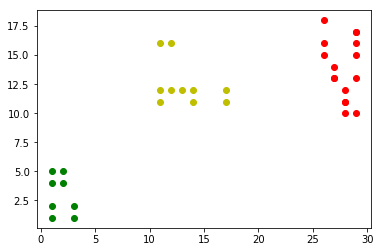

In [5]:
wantGroupNum = 3
finalGroup = Counter(clusters).most_common(wantGroupNum)
finalGroup = [onecount[0] for onecount in finalGroup]
dropPoints = [dataSet[idx] for idx in range(len(dataSet)) if clusters[idx] not in finalGroup]
cluster1 = [dataSet[idx] for idx in range(len(dataSet)) if clusters[idx] == finalGroup[0]]
cluster2 = [dataSet[idx] for idx in range(len(dataSet)) if clusters[idx] == finalGroup[1]]
cluster3 = [dataSet[idx] for idx in range(len(dataSet)) if clusters[idx] == finalGroup[2]]
pl.plot([eachpoint[0] for eachpoint in cluster1], [eachpoint[1] for eachpoint in cluster1], 'or')
pl.plot([eachpoint[0] for eachpoint in cluster2], [eachpoint[1] for eachpoint in cluster2], 'oy')
pl.plot([eachpoint[0] for eachpoint in cluster3], [eachpoint[1] for eachpoint in cluster3], 'og')
pl.plot([eachpoint[0] for eachpoint in dropPoints], [eachpoint[1] for eachpoint in dropPoints], 'ok')
pl.show()